In [40]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [41]:
h5_training_path = "/storage2/projects/smartEM/em-vis/smartem-data-train-errors.hdf5"

<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewHDF5 ['50']>
<KeysViewH

(array([55., 93., 38., 17., 16.,  5.,  4.,  0.,  0.,  2.]),
 array([0.00053583, 0.00470135, 0.00886687, 0.01303239, 0.0171979 ,
        0.02136342, 0.02552894, 0.02969446, 0.03385997, 0.03802549,
        0.04219101]),
 <BarContainer object of 10 artists>)

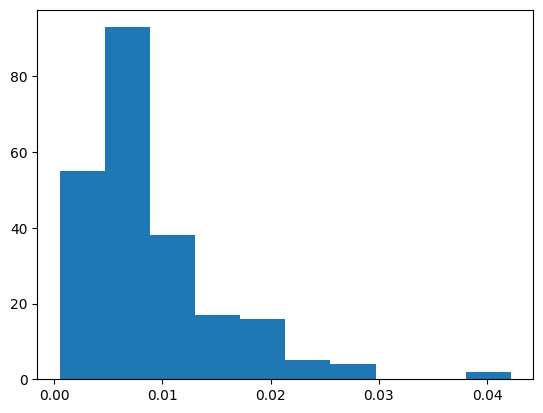

In [42]:
with h5py.File(h5_training_path, 'r') as f:
    rescan_fracs = []
    for reg in f.keys():
        print(f[f'{reg}'].keys())
        im = f[f'{reg}/50/im'][()]
        mask = f[f'{reg}/50/mask'][()]
        assert np.amax(mask) == 255
        assert len(np.unique(mask)) == 2
        rescan_fracs.append(np.sum(mask) / 255 / np.prod(mask.shape))

plt.hist(rescan_fracs)

(1632, 1920): uint8, 0-255
(1632, 1920): uint8, 0-255: 2


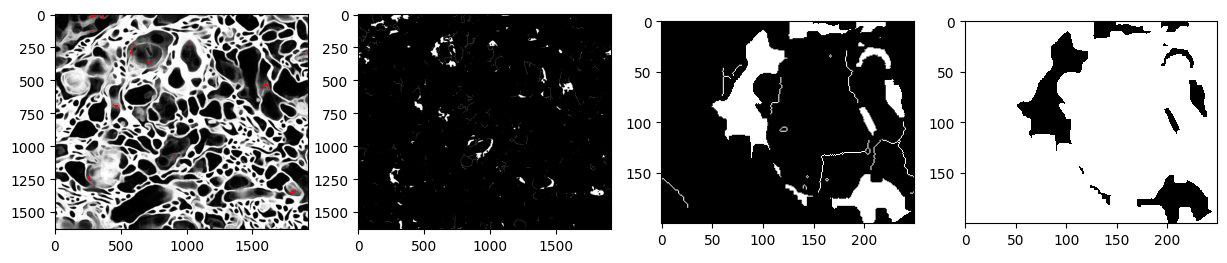

In [43]:
with h5py.File(h5_training_path, 'r') as f:
    im = f['001_1_1/50/im'][()]
    mask = f['001_1_1/50/mask'][()]

    print(f"{im.shape}: {im.dtype}, {np.amin(im)}-{np.amax(im)}")
    print(f"{mask.shape}: {mask.dtype}, {np.amin(mask)}-{np.amax(mask)}: {len(np.unique(mask))}")

    mask_masked = np.ma.masked_where(mask == 0, mask)

    f, axs = plt.subplots(ncols=4)
    axs[0].imshow(im, cmap="gray")
    axs[0].imshow(mask_masked, cmap="autumn")
    axs[1].imshow(mask, cmap="gray")
    axs[2].imshow(mask[200:400, 500:750], cmap="gray")
    axs[3].imshow(mask_masked[200:400, 500:750], cmap="gray")
    f.set_figheight(5)
    f.set_figwidth(15)